Nesta aula, vamos aprender como trabalhar com ngramas e stopwords, utilizando a bilioteca NLTK.

# NGRAMAS, Stopwords e NLTK
### Autor: Lucas Ferro Antunes de Oliveira
#### HAILab - PPGTS - PUCPR
### Adaptado por: Vitor Hugo Dias Santos
#### Sistemas de Informação - UFMG

lucas.ferro.2000@hotmail.com

vhugosantos@gmail.com

#Tokenização e normalização do corpus

In [32]:
# prompt: converta um arquivo pdf em txt padrão utf-8

%pip install PyPDF2

import PyPDF2
import re

def convert_pdf_to_txt(pdf_path, txt_path):
    try:
        with open(pdf_path, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            text = ''
            for page in pdf_reader.pages:
                text += page.extract_text()

            # Remove extra whitespace and newlines
            text = re.sub(r'\s+', ' ', text)

            with open(txt_path, 'w', encoding='utf-8') as txt_file:
                txt_file.write(text)

        print(f"PDF '{pdf_path}' converted to '{txt_path}' successfully.")
    except FileNotFoundError:
        print(f"Error: File '{pdf_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")


# Example usage:
pdf_file_path = 'PDF/Isaac Asimov - Eu, Robô.pdf'  # Replace with your PDF file path
txt_file_path = 'output.txt'      # Replace with desired output file path

convert_pdf_to_txt(pdf_file_path, txt_file_path)


Note: you may need to restart the kernel to use updated packages.
PDF 'PDF/Isaac Asimov - Eu, Robô.pdf' converted to 'output.txt' successfully.


In [33]:
# Instalação do NLTK
%pip install nltk==3.6.2

Note: you may need to restart the kernel to use updated packages.


In [34]:
%pip install pandas nltk matplotlib wordcloud Pillow


Note: you may need to restart the kernel to use updated packages.


In [35]:
# Importação de bibliotecas
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from datetime import datetime
from collections import Counter
from nltk import ngrams
import string
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import re
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/vhugosantos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
# pd.set_option('max_columns', None)
# pd.set_option('max_colwidth', None)

In [37]:
# Pega todas as pontuações
remove_pt = string.punctuation
remove_pt + "•"
remove_pt

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
# Baixa as stopwords para o português no NLTK
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_pt = set(stopwords.words('portuguese'))
len(stop_words_pt)
stop_words_pt

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/vhugosantos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',
 'houverí

In [39]:
stop_words_pt.add('ser')
stop_words_pt.add('entao')
stop_words_pt.add('de')

stop_words_pt

{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entao',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',

In [40]:
stop_words_pt.add('ainda')
stop_words_pt.add('porém')
stop_words_pt

{'a',
 'ainda',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entao',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 '

In [41]:
PATH = 'output.txt'

In [42]:
with open(PATH , 'r', encoding='utf8') as f:
    filecontent = f.read()

print(filecontent[0:])

Eu, Robô Isaac Asimov “Para John W. Campbell, Jr., que apadrinhou os robôs.” Tradução de Luiz Horácio da Matta Sobre o autor: O nome deste autor tornou-se familiar no decorrer das últimas décadas, tanto para cientistas como para leitores de ficção-científica. Escritor de enorme talento e assaz prolífico, ostenta um impressionante recorde de mais de cinqüenta sucessos literários no domínio da ficção e da não ficção, incluindo a famosa série “Fundação”. Nascido na Rússia, o Dr. Asimov estudou na Universidade de Columbia, onde se graduou em 1948; foi professor assistente de Bioquímica na Escola de Medicina da Universidade de Boston. Em 1958, deixou este cargo para se dedicar inteiramente à sua atividade de escritor. Sobre a digitalização desta obra: Se os livros tivessem preços acessíveis, todos poderiam comprá-los. A digitalização desta obra é um protesto contra a exclusão cultural, e por conseqüência social, causada pelos preços abusivos dos livros editados e publicados no Brasil. Assim

In [43]:
type(filecontent)

str

In [44]:
len(filecontent) # número de tokens

443381

## Transformando o texto completo em sentenças (tokenizer do NLTK)

In [45]:
sentencas = []
for sentence in sent_tokenize(filecontent, language = 'portuguese'):
    sentencas.append(sentence)

In [46]:
index = 1
for sentenca in sentencas[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {sentenca}')
    index+=1

1: Eu, Robô Isaac Asimov “Para John W. Campbell, Jr., que apadrinhou os robôs.” Tradução de Luiz Horácio da Matta Sobre o autor: O nome deste autor tornou-se familiar no decorrer das últimas décadas, tanto para cientistas como para leitores de ficção-científica.
2: Escritor de enorme talento e assaz prolífico, ostenta um impressionante recorde de mais de cinqüenta sucessos literários no domínio da ficção e da não ficção, incluindo a famosa série “Fundação”.
3: Nascido na Rússia, o Dr. Asimov estudou na Universidade de Columbia, onde se graduou em 1948; foi professor assistente de Bioquímica na Escola de Medicina da Universidade de Boston.
4: Em 1958, deixou este cargo para se dedicar inteiramente à sua atividade de escritor.
5: Sobre a digitalização desta obra: Se os livros tivessem preços acessíveis, todos poderiam comprá-los.
6: A digitalização desta obra é um protesto contra a exclusão cultural, e por conseqüência social, causada pelos preços abusivos dos livros editados e publicado

## Segmentação por quebra de linha e depois pelo tokenizer do NLTK

In [47]:
sentencas_linha = []
for sentence in filecontent.split('\n'):
    if sentence != '':
        for processed_sentence in sent_tokenize(sentence, language = 'portuguese'):
            sentencas_linha.append(processed_sentence)

In [48]:
sentencas_linha[0:10]

['Eu, Robô Isaac Asimov “Para John W. Campbell, Jr., que apadrinhou os robôs.” Tradução de Luiz Horácio da Matta Sobre o autor: O nome deste autor tornou-se familiar no decorrer das últimas décadas, tanto para cientistas como para leitores de ficção-científica.',
 'Escritor de enorme talento e assaz prolífico, ostenta um impressionante recorde de mais de cinqüenta sucessos literários no domínio da ficção e da não ficção, incluindo a famosa série “Fundação”.',
 'Nascido na Rússia, o Dr. Asimov estudou na Universidade de Columbia, onde se graduou em 1948; foi professor assistente de Bioquímica na Escola de Medicina da Universidade de Boston.',
 'Em 1958, deixou este cargo para se dedicar inteiramente à sua atividade de escritor.',
 'Sobre a digitalização desta obra: Se os livros tivessem preços acessíveis, todos poderiam comprá-los.',
 'A digitalização desta obra é um protesto contra a exclusão cultural, e por conseqüência social, causada pelos preços abusivos dos livros editados e publi

In [49]:
index = 1
for sentenca in sentencas_linha[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {sentenca}')
    index+=1

1: Eu, Robô Isaac Asimov “Para John W. Campbell, Jr., que apadrinhou os robôs.” Tradução de Luiz Horácio da Matta Sobre o autor: O nome deste autor tornou-se familiar no decorrer das últimas décadas, tanto para cientistas como para leitores de ficção-científica.
2: Escritor de enorme talento e assaz prolífico, ostenta um impressionante recorde de mais de cinqüenta sucessos literários no domínio da ficção e da não ficção, incluindo a famosa série “Fundação”.
3: Nascido na Rússia, o Dr. Asimov estudou na Universidade de Columbia, onde se graduou em 1948; foi professor assistente de Bioquímica na Escola de Medicina da Universidade de Boston.
4: Em 1958, deixou este cargo para se dedicar inteiramente à sua atividade de escritor.
5: Sobre a digitalização desta obra: Se os livros tivessem preços acessíveis, todos poderiam comprá-los.
6: A digitalização desta obra é um protesto contra a exclusão cultural, e por conseqüência social, causada pelos preços abusivos dos livros editados e publicado

## Tokenização de cada sentença em palavras (tokenizer do NLTK)





In [50]:
sentencas_tokenizadas = []

for sentenca in sentencas_linha:
    tokenized_sentence = word_tokenize(sentenca, language='portuguese')
    sentencas_tokenizadas.append(tokenized_sentence)
index = 1
for tokens in sentencas_tokenizadas[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {tokens}')
    index+=1

1: ['Eu', ',', 'Robô', 'Isaac', 'Asimov', '“', 'Para', 'John', 'W.', 'Campbell', ',', 'Jr.', ',', 'que', 'apadrinhou', 'os', 'robôs.', '”', 'Tradução', 'de', 'Luiz', 'Horácio', 'da', 'Matta', 'Sobre', 'o', 'autor', ':', 'O', 'nome', 'deste', 'autor', 'tornou-se', 'familiar', 'no', 'decorrer', 'das', 'últimas', 'décadas', ',', 'tanto', 'para', 'cientistas', 'como', 'para', 'leitores', 'de', 'ficção-científica', '.']
2: ['Escritor', 'de', 'enorme', 'talento', 'e', 'assaz', 'prolífico', ',', 'ostenta', 'um', 'impressionante', 'recorde', 'de', 'mais', 'de', 'cinqüenta', 'sucessos', 'literários', 'no', 'domínio', 'da', 'ficção', 'e', 'da', 'não', 'ficção', ',', 'incluindo', 'a', 'famosa', 'série', '“', 'Fundação', '”', '.']
3: ['Nascido', 'na', 'Rússia', ',', 'o', 'Dr.', 'Asimov', 'estudou', 'na', 'Universidade', 'de', 'Columbia', ',', 'onde', 'se', 'graduou', 'em', '1948', ';', 'foi', 'professor', 'assistente', 'de', 'Bioquímica', 'na', 'Escola', 'de', 'Medicina', 'da', 'Universidade', 'de

## Pre-processamento dos elementos tokenizados
A ideia aqui é retirar todas as palavras que pertencem a lista de stopwords, deixar tudo em minúsculos, retirar espaços e quebras de linhas adicionais desnecessários.

In [51]:
from typing import TextIO
sent_tokenizada_preprocessed = []
for sent_tokenizada in sentencas_tokenizadas:
    raw = [token.lower() for token in sent_tokenizada]

    raw = [''.join(c for c in s if c not in remove_pt+'–'+'🙁'+'\’'+'\”'+"“"+"•") for s in raw]
    raw = [re.sub(r"\d+[.,]?\d*","", s) for s in raw]
    raw = [s for s in raw if s not in stop_words_pt] # stopwords
    raw = [' '.join(s.split()) for s in raw if s]
    string = ' '.join(raw).rstrip().lstrip()
    if string != '':
        sent_tokenizada_preprocessed.append(string)

index = 1
for texto in sent_tokenizada_preprocessed[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {texto}')
    index+=1


1: robô isaac asimov john w campbell jr apadrinhou robôs tradução luiz horácio matta sobre autor nome deste autor tornouse familiar decorrer últimas décadas tanto cientistas leitores ficçãocientífica
2: escritor enorme talento assaz prolífico ostenta impressionante recorde cinqüenta sucessos literários domínio ficção ficção incluindo famosa série fundação
3: nascido rússia dr asimov estudou universidade columbia onde graduou professor assistente bioquímica escola medicina universidade boston
4: deixou cargo dedicar inteiramente atividade escritor
5: sobre digitalização desta obra livros preços acessíveis todos poderiam comprálos
6: digitalização desta obra protesto contra exclusão cultural conseqüência social causada preços abusivos livros editados publicados brasil
7: assim totalmente condenável venda deste elivro qualquer circunstância
8: homenagem molly millions peter pan viaje outras terras pagar pedágio
9: índice introdução
10: robbie
11: brincadeira pegar
12: razão
13: pegar coel

#NGramas

In [52]:
len(sent_tokenizada_preprocessed)

6764

In [55]:
import os
ngram_value = 1 #muda o tamanho do engrama
most_common_value = 100

ngram_counts = [list(ngrams(s.split(), ngram_value)) for s in sent_tokenizada_preprocessed]
flat_ngram_counts = [item for sublist in ngram_counts for item in sublist]
ngram_list = Counter(flat_ngram_counts)

common = ngram_list.most_common(most_common_value)

df_common = pd.DataFrame(common, columns = ['Ngram','Count'])
index = 1
for n_gram in ngram_counts[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {n_gram}')
    index+=1

1: [('robô',), ('isaac',), ('asimov',), ('john',), ('w',), ('campbell',), ('jr',), ('apadrinhou',), ('robôs',), ('tradução',), ('luiz',), ('horácio',), ('matta',), ('sobre',), ('autor',), ('nome',), ('deste',), ('autor',), ('tornouse',), ('familiar',), ('decorrer',), ('últimas',), ('décadas',), ('tanto',), ('cientistas',), ('leitores',), ('ficçãocientífica',)]
2: [('escritor',), ('enorme',), ('talento',), ('assaz',), ('prolífico',), ('ostenta',), ('impressionante',), ('recorde',), ('cinqüenta',), ('sucessos',), ('literários',), ('domínio',), ('ficção',), ('ficção',), ('incluindo',), ('famosa',), ('série',), ('fundação',)]
3: [('nascido',), ('rússia',), ('dr',), ('asimov',), ('estudou',), ('universidade',), ('columbia',), ('onde',), ('graduou',), ('professor',), ('assistente',), ('bioquímica',), ('escola',), ('medicina',), ('universidade',), ('boston',)]
4: [('deixou',), ('cargo',), ('dedicar',), ('inteiramente',), ('atividade',), ('escritor',)]
5: [('sobre',), ('digitalização',), ('des

In [56]:
index = 1
for n_gram in flat_ngram_counts[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {n_gram}')
    index+=1

1: ('robô',)
2: ('isaac',)
3: ('asimov',)
4: ('john',)
5: ('w',)
6: ('campbell',)
7: ('jr',)
8: ('apadrinhou',)
9: ('robôs',)
10: ('tradução',)
11: ('luiz',)
12: ('horácio',)
13: ('matta',)
14: ('sobre',)
15: ('autor',)
16: ('nome',)
17: ('deste',)
18: ('autor',)
19: ('tornouse',)
20: ('familiar',)
21: ('decorrer',)
22: ('últimas',)
23: ('décadas',)
24: ('tanto',)
25: ('cientistas',)
26: ('leitores',)
27: ('ficçãocientífica',)
28: ('escritor',)
29: ('enorme',)
30: ('talento',)
31: ('assaz',)
32: ('prolífico',)
33: ('ostenta',)
34: ('impressionante',)
35: ('recorde',)
36: ('cinqüenta',)
37: ('sucessos',)
38: ('literários',)
39: ('domínio',)
40: ('ficção',)
41: ('ficção',)
42: ('incluindo',)
43: ('famosa',)
44: ('série',)
45: ('fundação',)
46: ('nascido',)
47: ('rússia',)
48: ('dr',)
49: ('asimov',)
50: ('estudou',)
51: ('universidade',)
52: ('columbia',)
53: ('onde',)
54: ('graduou',)
55: ('professor',)
56: ('assistente',)
57: ('bioquímica',)
58: ('escola',)
59: ('medicina',)
60: ('univ

In [57]:
len(ngram_list)

9818

In [58]:
common

[(('robô',), 353),
 (('robôs',), 313),
 (('powell',), 290),
 (('donovan',), 263),
 (('bem',), 256),
 (('calvin',), 183),
 (('susan',), 178),
 (('disse',), 167),
 (('tudo',), 140),
 (('pode',), 135),
 (('lanning',), 134),
 (('senhor',), 131),
 (('então',), 129),
 (('apenas',), 122),
 (('cérebro',), 121),
 (('byerley',), 121),
 (('agora',), 119),
 (('dois',), 118),
 (('bogert',), 112),
 (('olhos',), 109),
 (('voz',), 101),
 (('robbie',), 99),
 (('todos',), 97),
 (('vez',), 97),
 (('coisa',), 96),
 (('máquina',), 94),
 (('qualquer',), 92),
 (('gloria',), 89),
 (('sim',), 89),
 (('homem',), 88),
 (('modo',), 87),
 (('fazer',), 86),
 (('sabe',), 86),
 (('aqui',), 86),
 (('homens',), 85),
 (('assim',), 81),
 (('antes',), 81),
 (('tempo',), 81),
 (('sobre',), 79),
 (('tão',), 79),
 (('cabeça',), 78),
 (('lado',), 77),
 (('outro',), 77),
 (('primeira',), 76),
 (('nada',), 76),
 (('onde',), 74),
 (('replicou',), 74),
 (('deve',), 73),
 (('vamos',), 72),
 (('talvez',), 72),
 (('herbie',), 72),
 

In [59]:
df_common.head(30)

,Ngram,Count
0,"(robô,)",353
1,"(robôs,)",313
2,"(powell,)",290
3,"(donovan,)",263
4,"(bem,)",256
5,"(calvin,)",183
6,"(susan,)",178
7,"(disse,)",167
8,"(tudo,)",140
9,"(pode,)",135


In [60]:
# Quantidade de palavras
len(flat_ngram_counts)

40674

In [61]:
# Quantidade de palavras únicas
len(ngram_list)

9818

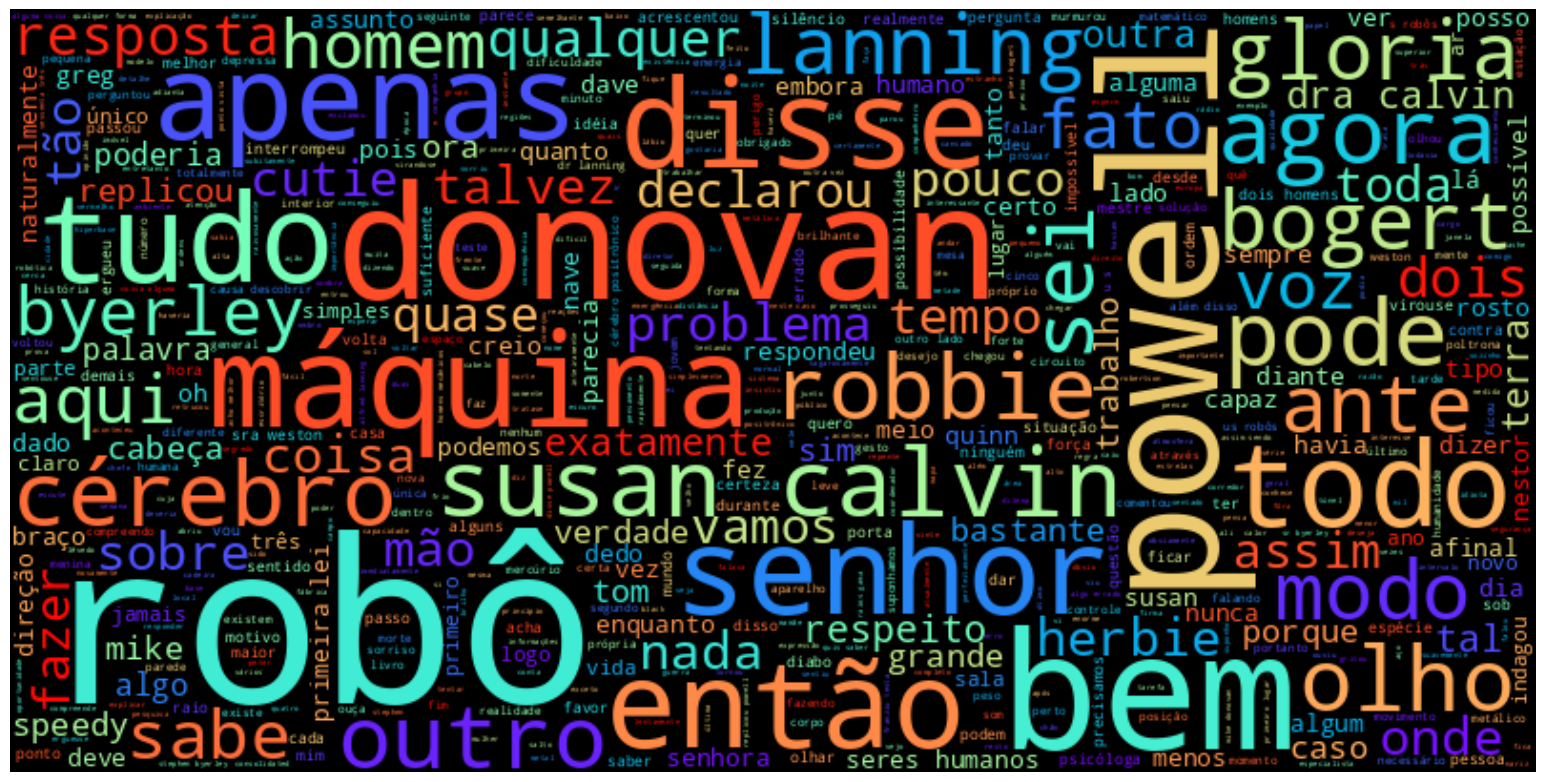

In [68]:
color = 'black'
height = 400
width = 800
max_words = 2000
colormap = 'rainbow'
size_X = 50
size_Y = 50

str_text=" ".join(sent_tokenizada_preprocessed)


wordcloud = WordCloud(background_color = color, max_words = max_words, max_font_size = 120, colormap = colormap, height = height, width = width).generate(str_text)

X = size_X/2.54
Y = size_Y/2.25

fig = plt.figure(figsize = [X, Y])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.box(False)
plt.show()

In [30]:
%pip install PyPDF2


Note: you may need to restart the kernel to use updated packages.


fazer a frequencia, Carlos

In [31]:
# prompt: leia um arquivo pdf e gere um txt com utf8

import PyPDF2
import re

def convert_pdf_to_txt(pdf_path, txt_path):
    try:
        with open(pdf_path, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            text = ''
            for page in pdf_reader.pages:
                text += page.extract_text()

            # Remove extra whitespace and newlines
            text = re.sub(r'\s+', ' ', text)

            with open(txt_path, 'w', encoding='utf-8') as txt_file:
                txt_file.write(text)

        print(f"PDF '{pdf_path}' converted to '{txt_path}' successfully.")
    except FileNotFoundError:
        print(f"Error: File '{pdf_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage (replace with your file paths):
pdf_file_path = '/content/DalleScienzeDelLinguaggioAllEducazionePlurilingue.ocr.pdf'
txt_file_path = '/content/DalleScienzeDelLinguaggioAllEducazionePlurilingue.txt'

convert_pdf_to_txt(pdf_file_path, txt_file_path)


Error: File '/content/DalleScienzeDelLinguaggioAllEducazionePlurilingue.ocr.pdf' not found.


In [32]:
# prompt: coloque cada página do pdf num arquivo txt assinumeroado pagina001.txt, pagina002.txt etc. dentro de um diretorio.

import os
import PyPDF2

def split_pdf_to_txt_files(pdf_path, output_dir):
    """Splits a PDF file into individual text files, one per page."""

    try:
        with open(pdf_path, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            num_pages = len(pdf_reader.pages)

            # Create the output directory if it doesn't exist
            os.makedirs(output_dir, exist_ok=True)

            for page_num in range(num_pages):
                page = pdf_reader.pages[page_num]
                text = page.extract_text()

                # Format the filename with leading zeros
                filename = os.path.join(output_dir, f"pagina{page_num + 1:03d}.txt")

                with open(filename, 'w', encoding='utf-8') as txt_file:
                    txt_file.write(text)

            print(f"PDF '{pdf_path}' split into text files in '{output_dir}' successfully.")
    except FileNotFoundError:
        print(f"Error: File '{pdf_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")


# Example usage:
pdf_file_path = '/content/DalleScienzeDelLinguaggioAllEducazionePlurilingue.ocr.pdf'
output_directory = '/content/pdf_pages'  # Directory to save the text files
split_pdf_to_txt_files(pdf_file_path, output_directory)


Error: File '/content/DalleScienzeDelLinguaggioAllEducazionePlurilingue.ocr.pdf' not found.


In [33]:
!tar -czvf /content/pdf_pages.tgz /content/pdf_pages/

tar: Removendo "/" inicial dos nomes dos membros
tar: /content/pdf_pages: Função stat falhou: Arquivo ou diretório inexistente
tar (child): /content/pdf_pages.tgz: Função open falhou: Arquivo ou diretório inexistente
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
